In [1]:
# Import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical


In [4]:
class FaceMaskClassifier :

    def __init__(self):
        # Load and prepare data
        self.load_data()
        self.class_names = ['without_mask','with_mask']


    def load_data(self):

      path1 = r'/content/drive/MyDrive/data/with_mask'
      path2 = r'/content/drive/MyDrive/data/without_mask'
      self.with_mask_files = os.listdir(path1)
      self.without_mask_files = os.listdir(path2)

      self.with_mask_labels = [1] * len(self.with_mask_files)
      self.without_mask_labels = [0] * len(self.without_mask_files)
      self.all_labels = self.with_mask_labels + self.without_mask_labels



      self.data = []
      self.with_mask_path = r'/content/drive/MyDrive/data/with_mask/'
      for img_file in self.with_mask_files:
        image = cv2.imread(self.with_mask_path + img_file)
        image = cv2.resize(image,(128,128))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = np.array(image)
        self.data.append(image)


      self.without_mask_path = r'/content/drive/MyDrive/data/without_mask/'


      for img_file in self.without_mask_files:
        image = cv2.imread(self.without_mask_path + img_file)
        image = cv2.resize(image,(128,128))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = np.array(image)
        self.data.append(image)


      self.X = np.array(self.data)
      self.Y = np.array(self.all_labels)

      self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.Y, test_size=0.2,stratify = self.Y, random_state=42)

      # Normalize pixel values
      self.x_train = self.x_train.astype('float32') / 255.0
      self.x_test = self.x_test.astype('float32') / 255.0

      # Reshape for traditional classifiers
      self.x_train_flat = self.x_train.reshape(self.x_train.shape[0], -1)
      self.x_test_flat = self.x_test.reshape(self.x_test.shape[0], -1)


    def visualize_results(self, history=None):
        """Visualize training results and examples"""
        # Set up the figure
        plt.figure(figsize=(15, 10))

        # Plot sample images
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(self.x_train[i], cmap='gray')
            plt.title(self.class_names[self.y_train[i]])
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # If neural network history is provided, plot learning curves
        if history is not None:
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training')
            plt.plot(history.history['val_accuracy'], label='Validation')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training')
            plt.plot(history.history['val_loss'], label='Validation')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.tight_layout()
            plt.show()


    def plot_confusion_matrix(self, y_true, y_pred, title):
        """Plot confusion matrix"""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title(title)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


    def train_knn(self, n_neighbors=5):
        """Train K-Nearest Neighbors classifier"""
        print("Training KNN classifier...")
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.x_train_flat, self.y_train)

        # Make predictions
        y_pred = self.knn.predict(self.x_test_flat)

        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, y_pred, average='weighted')

        print(f"KNN Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        return accuracy, precision, recall, f1

    def train_logistic_regression(self):
        """Train Logistic Regression classifier"""
        print("Training Logistic Regression classifier...")
        self.lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
        self.lr.fit(self.x_train_flat, self.y_train)

        # Make predictions
        y_pred = self.lr.predict(self.x_test_flat)

        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, y_pred, average='weighted')

        print(f"Logistic Regression Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        return accuracy, precision, recall, f1

    def train_SVM (self):
        print ("Training SVM classifier...")
        self.svm = SVC(kernel='rbf', C=1.0, gamma='scale')
        self.svm.fit(self.x_train_flat, self.y_train)

        # Make predictions
        y_pred = self.svm.predict(self.x_test_flat)

        # Calculate metrics
        accuracy = accuracy_score(self.y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, y_pred, average='weighted')

        print(f"SVM Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        return accuracy, precision, recall, f1

    def build_cnn(self):
        """Build and train Convolutional Neural Network"""
        print("Building and training Convolutional Neural Network...")
        self.cnn = Sequential()
        self.cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
        self.cnn.add(MaxPooling2D(pool_size=(2,2)))

        self.cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
        self.cnn.add(MaxPooling2D(pool_size=(2,2)))

        self.cnn.add(Flatten())

        self.cnn.add(Dense(128, activation='relu'))
        self.cnn.add(Dropout(0.5))

        self.cnn.add(Dense(64, activation='relu'))
        self.cnn.add(Dropout(0.5))
        ##        number_of_calsses,(sigmoid or softmax)---> sigmoid: works with low number of classes , softmax: works better with multi-class data
        self.cnn.add(Dense(2, activation='sigmoid'))

        self.cnn.compile(optimizer='adam',
                                  loss='sparse_categorical_crossentropy',
                                  metrics=['accuracy'])
        # Train the model
        history = self.cnn.fit(self.x_train, self.y_train,
                            epochs=6,    #if we increase it the val_acc and the acc should increase
                            validation_split=0.1)
        # Evaluate the model
        test_loss, test_accuracy = self.cnn.evaluate(self.x_test, self.y_test)
        y_pred = np.argmax(self.cnn.predict(self.x_test), axis=1)
        precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, y_pred, average='weighted')

        print(f"\nConvolutinoal Neural Network Metrics:")
        print(f"Test accuracy: {test_accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")

        return history, test_accuracy, precision, recall, f1






    def run_complete_analysis(self):
        """Run complete analysis with all methods"""
        # 1. Visualize sample images
        print("Visualizing sample images...")
        self.visualize_results()

        # 2. Train and evaluate KNN
        knn_metrics = self.train_knn()
        y_pred_knn = self.knn.predict(self.x_test_flat)
        self.plot_confusion_matrix(self.y_test, y_pred_knn, 'KNN Confusion Matrix')

        # 3. Train and evaluate Logistic Regression
        lr_metrics = self.train_logistic_regression()
        y_pred_lr = self.lr.predict(self.x_test_flat)
        self.plot_confusion_matrix(self.y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')

        # 4. Train and evaluate SVM
        svm_metrices = self.train_SVM()
        y_pred_lr = self.svm.predict(self.x_test_flat)
        self.plot_confusion_matrix(self.y_test, y_pred_lr, 'SVM Confusion Matrix')

        # 5.Train and evaluate Convolutional Neural Networks
        cnn_history, *cnn_metrics = self.build_cnn()
        y_pred_cnn = np.argmax(self.cnn.predict(self.x_test), axis=1)
        self.plot_confusion_matrix(self.y_test, y_pred_cnn, 'CNN Confusion Matrix')


        # 6. Visualize neural network training history
        self.visualize_results(cnn_history)

        # 8. Compare all methods
        methods = ['KNN', 'Logistic Regression','SVM','CNN']
        metrics = [knn_metrics, lr_metrics,svm_metrices ,cnn_metrics]

        print("\nComparison of All Methods:")
        print("Method      Accuracy  Precision  Recall    F1-Score")
        print("-" * 50)
        for method, metric in zip(methods, metrics):
            print(f"{method:<12} {metric[0]:.4f}   {metric[1]:.4f}    {metric[2]:.4f}   {metric[3]:.4f}")

Visualizing sample images...


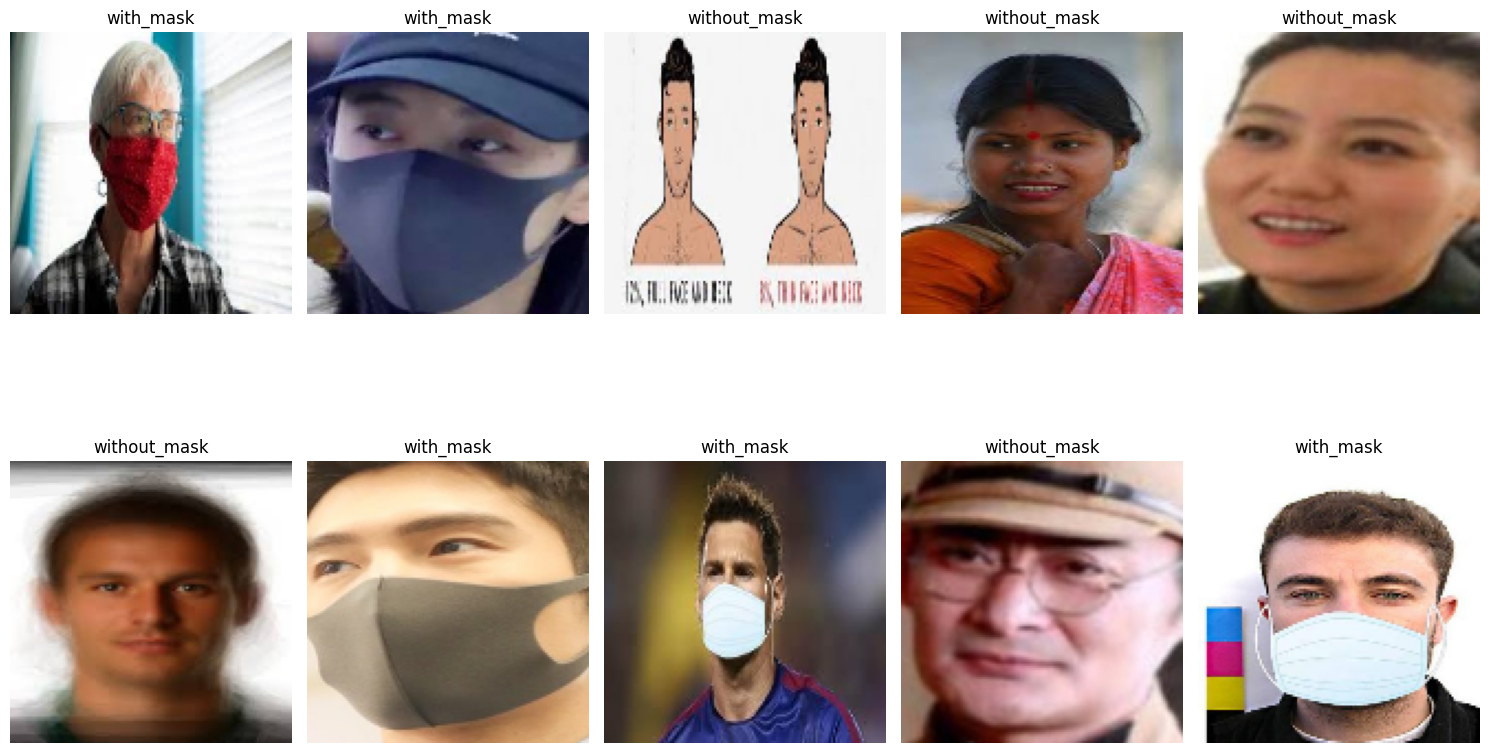

Training KNN classifier...
KNN Metrics:
Accuracy: 0.7997
Precision: 0.8160
Recall: 0.7997
F1-score: 0.7968


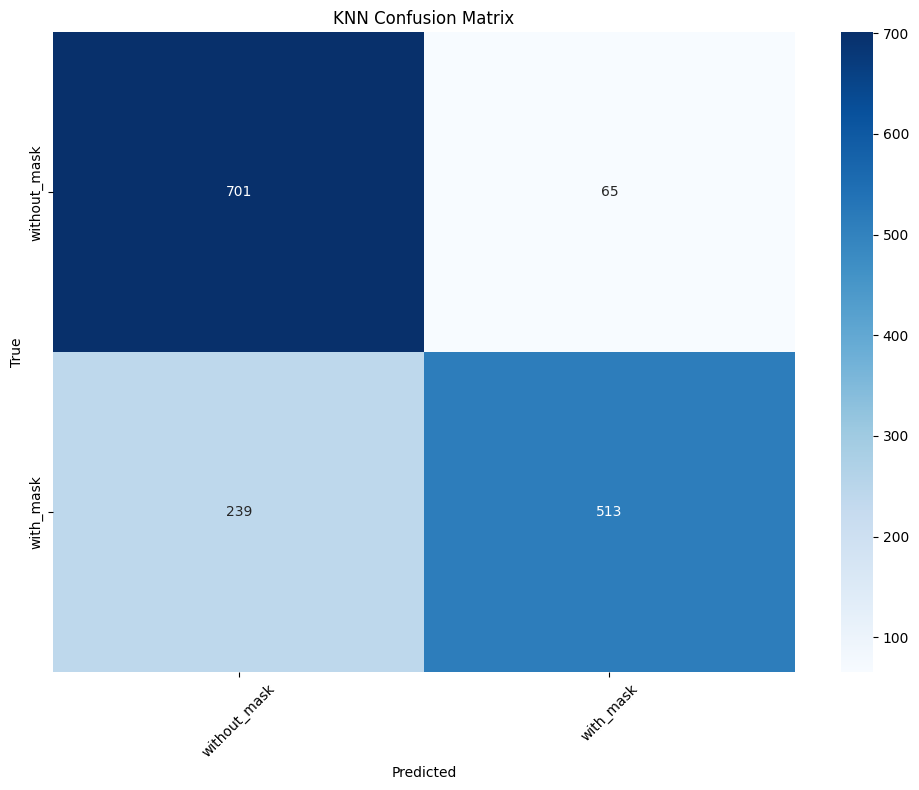

Training Logistic Regression classifier...
Logistic Regression Metrics:
Accuracy: 0.8689
Precision: 0.8689
Recall: 0.8689
F1-score: 0.8689


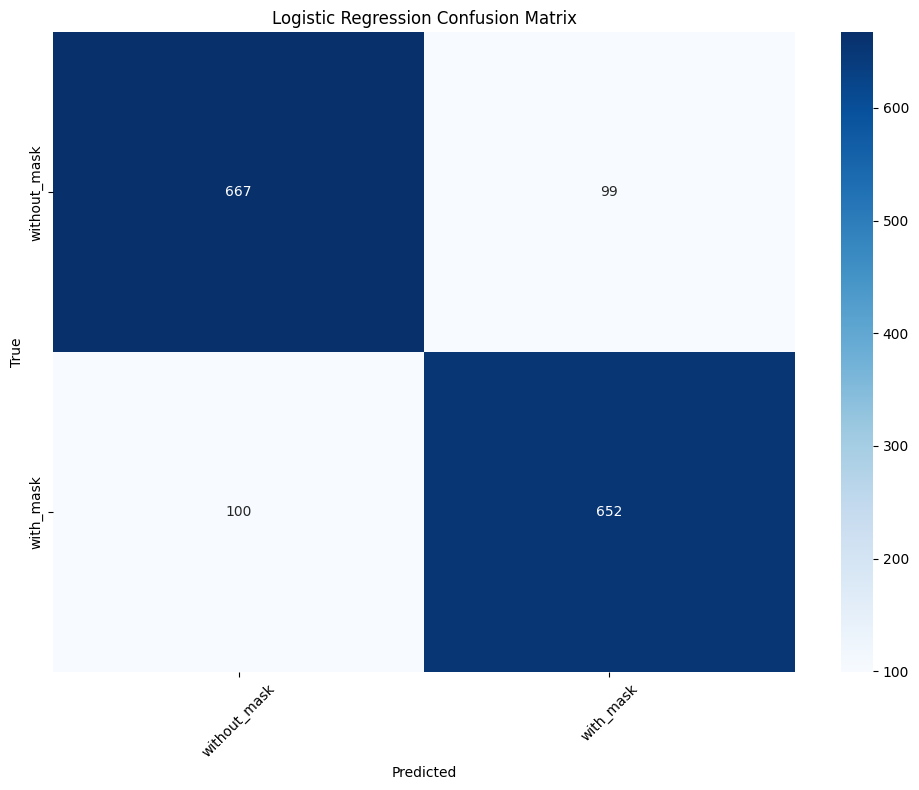

Training SVM classifier...
SVM Metrics:
Accuracy: 0.9071
Precision: 0.9075
Recall: 0.9071
F1-score: 0.9071


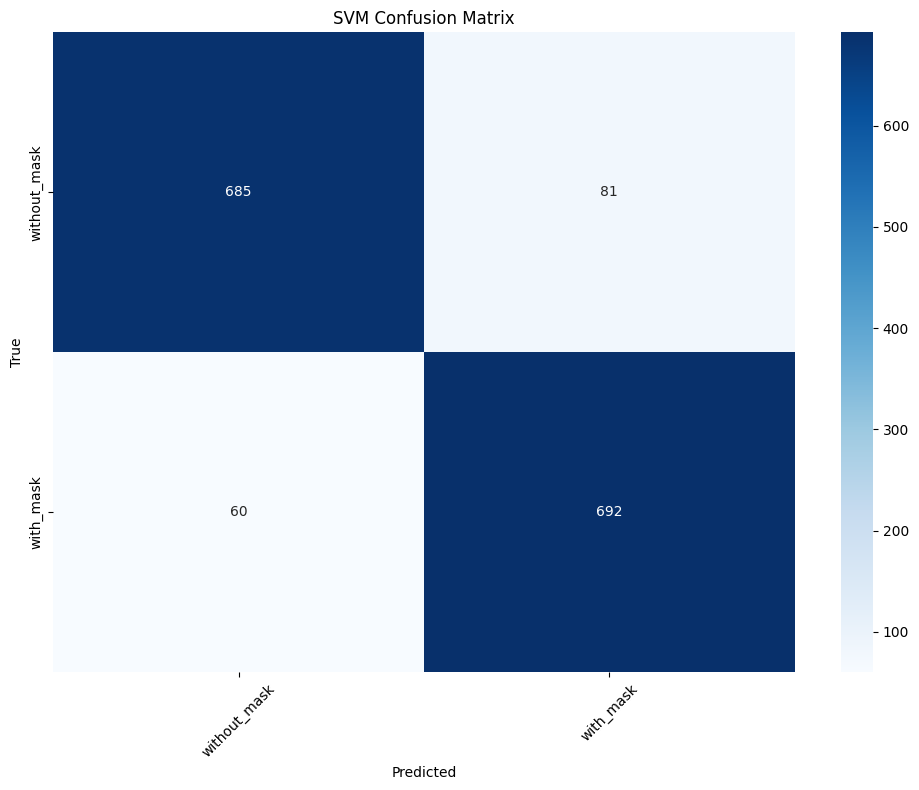

Building and training Convolutional Neural Network...
Epoch 1/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 145s 838ms/step - accuracy: 0.7463 - loss: 0.5847 - val_accuracy: 0.9012 - val_loss: 0.2414
Epoch 2/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 199s 820ms/step - accuracy: 0.8817 - loss: 0.2895 - val_accuracy: 0.9028 - val_loss: 0.2315
Epoch 3/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 137s 792ms/step - accuracy: 0.9032 - loss: 0.2424 - val_accuracy: 0.9160 - val_loss: 0.2020
Epoch 4/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 138s 809ms/step - accuracy: 0.9294 - loss: 0.1804 - val_accuracy: 0.9308 - val_loss: 0.1904
Epoch 5/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 145s 825ms/step - accuracy: 0.9392 - loss: 0.1642 - val_accuracy: 0.9275 - val_loss: 0.2121
Epoch 6/6
171/171 ━━━━━━━━━━━━━━━━━━━━ 141s 824ms/step - accuracy: 0.9478 - loss: 0.1353 - val_accuracy: 0.9325 - val_loss: 0.2263
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.9301 - loss: 0.2266
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step

Convolutinoal Neural Network Metrics:
Tes

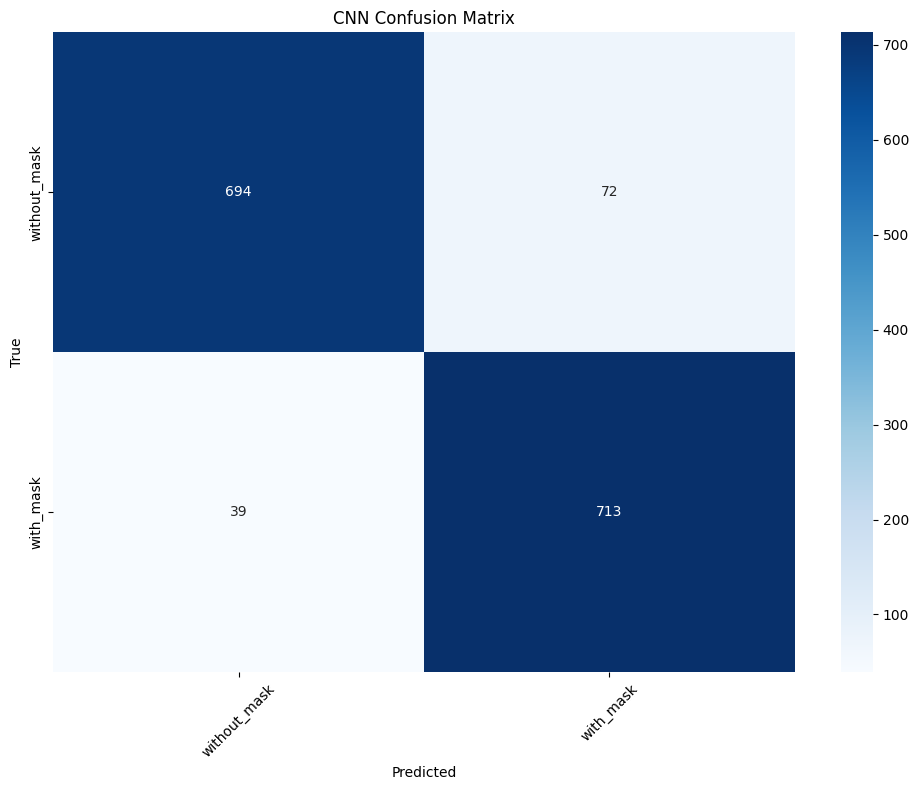

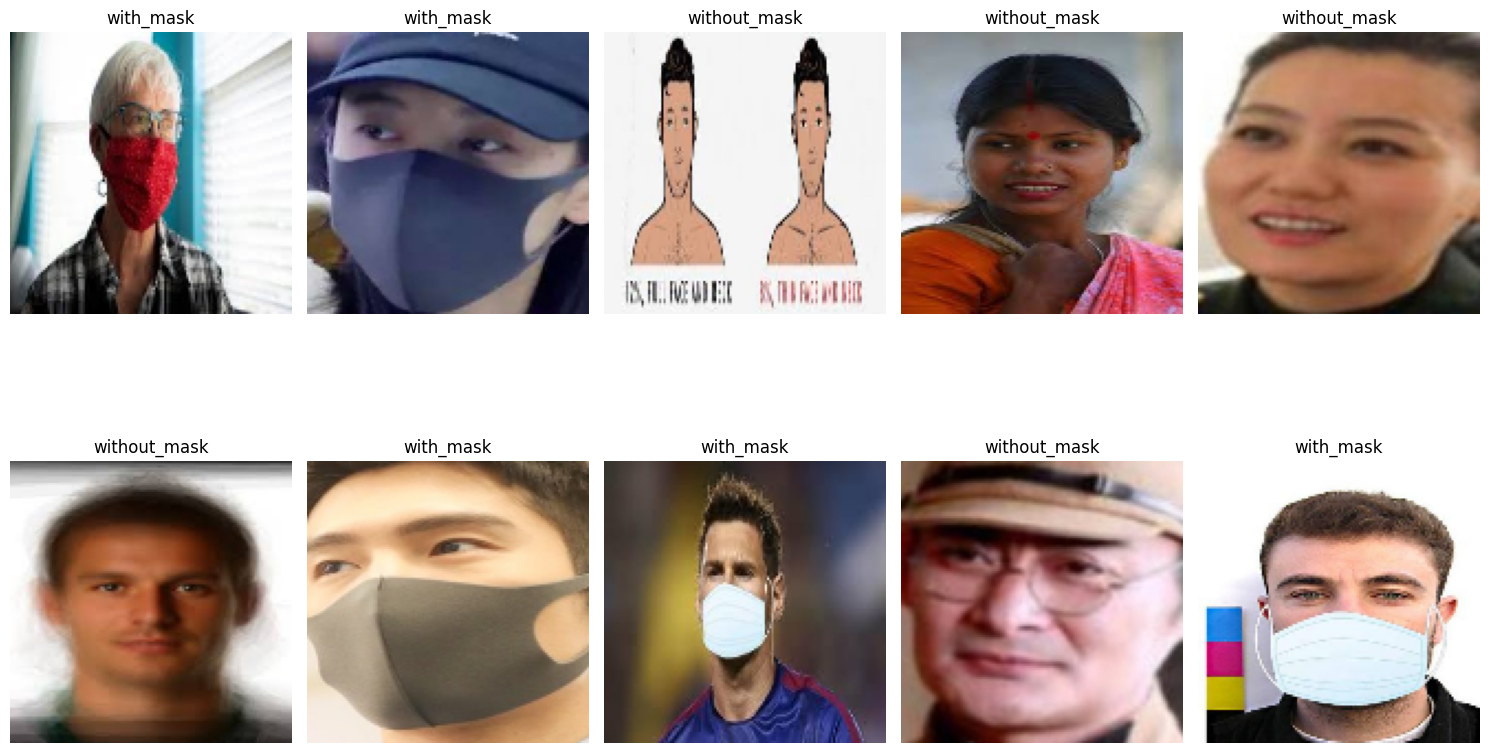

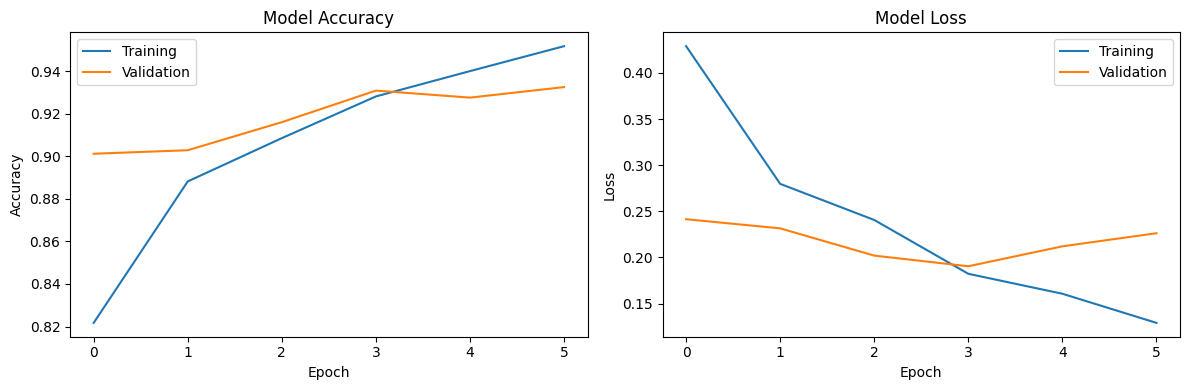


Comparison of All Methods:
Method      Accuracy  Precision  Recall    F1-Score
--------------------------------------------------
KNN          0.7997   0.8160    0.7997   0.7968
Logistic Regression 0.8689   0.8689    0.8689   0.8689
SVM          0.9071   0.9075    0.9071   0.9071
CNN          0.9269   0.9277    0.9269   0.9269


In [5]:
# Run the complete analysis
if __name__ == "__main__":

    classifier = FaceMaskClassifier()
    classifier.run_complete_analysis()